<a href="https://colab.research.google.com/github/rachel1818/Emotions/blob/main/Emotions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

!pip install brewer2mpl

### Redefine pictures with digust label as angry

In [ ]:
def emotional_count(y_train, classes):
   
    emotion_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_number, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_number
        class_count = sum(y_train == (new_number))
        emotion_classcount[_class] = (new_number, class_count)
    return y_train.values, emotion_classcount


### Mount drive
Please upload the dataset on your dataset as it's huge and then run this.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Function to load dataset which is then rescaled and reshaped

In [ ]:
def load_dataset(sample_split=0.3, usage='Training',classes=['Angry','Happy'], path = '/content/drive/MyDrive/fer20131.csv'):
    
    df = pd.read_csv(path)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    row = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[row]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotional_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

### Display few lines in dataset

In [ ]:
URL = 'https://drive.google.com/file/d/1-Vm7cfMFZ_UtqDlWKJN1RND_GWQimGaL/view?usp=sharing'
path = '/content/drive/MyDrive/fer20131.csv'
df = pd.read_csv(path)
df.head(4)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


Three datasets are loaded

In [ ]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

X_test, y_test = load_dataset(sample_split=1.0,classes=emo,usage='PrivateTest')

X_train, y_train = load_dataset(sample_split=1.0,classes=emo,usage= 'Training')

X_val,y_val = load_dataset(sample_split=1.0,classes=emo,usage= 'PublicTest')

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


### Display of shape of the dataset

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


### The function is used to load dataset into numpy

In [ ]:
def save_dataset(X_test, y_test, fname=''):
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_dataset(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (zip(labels, counts))

Private test set


### Display of few initial pictures in the dataset ***edit this code

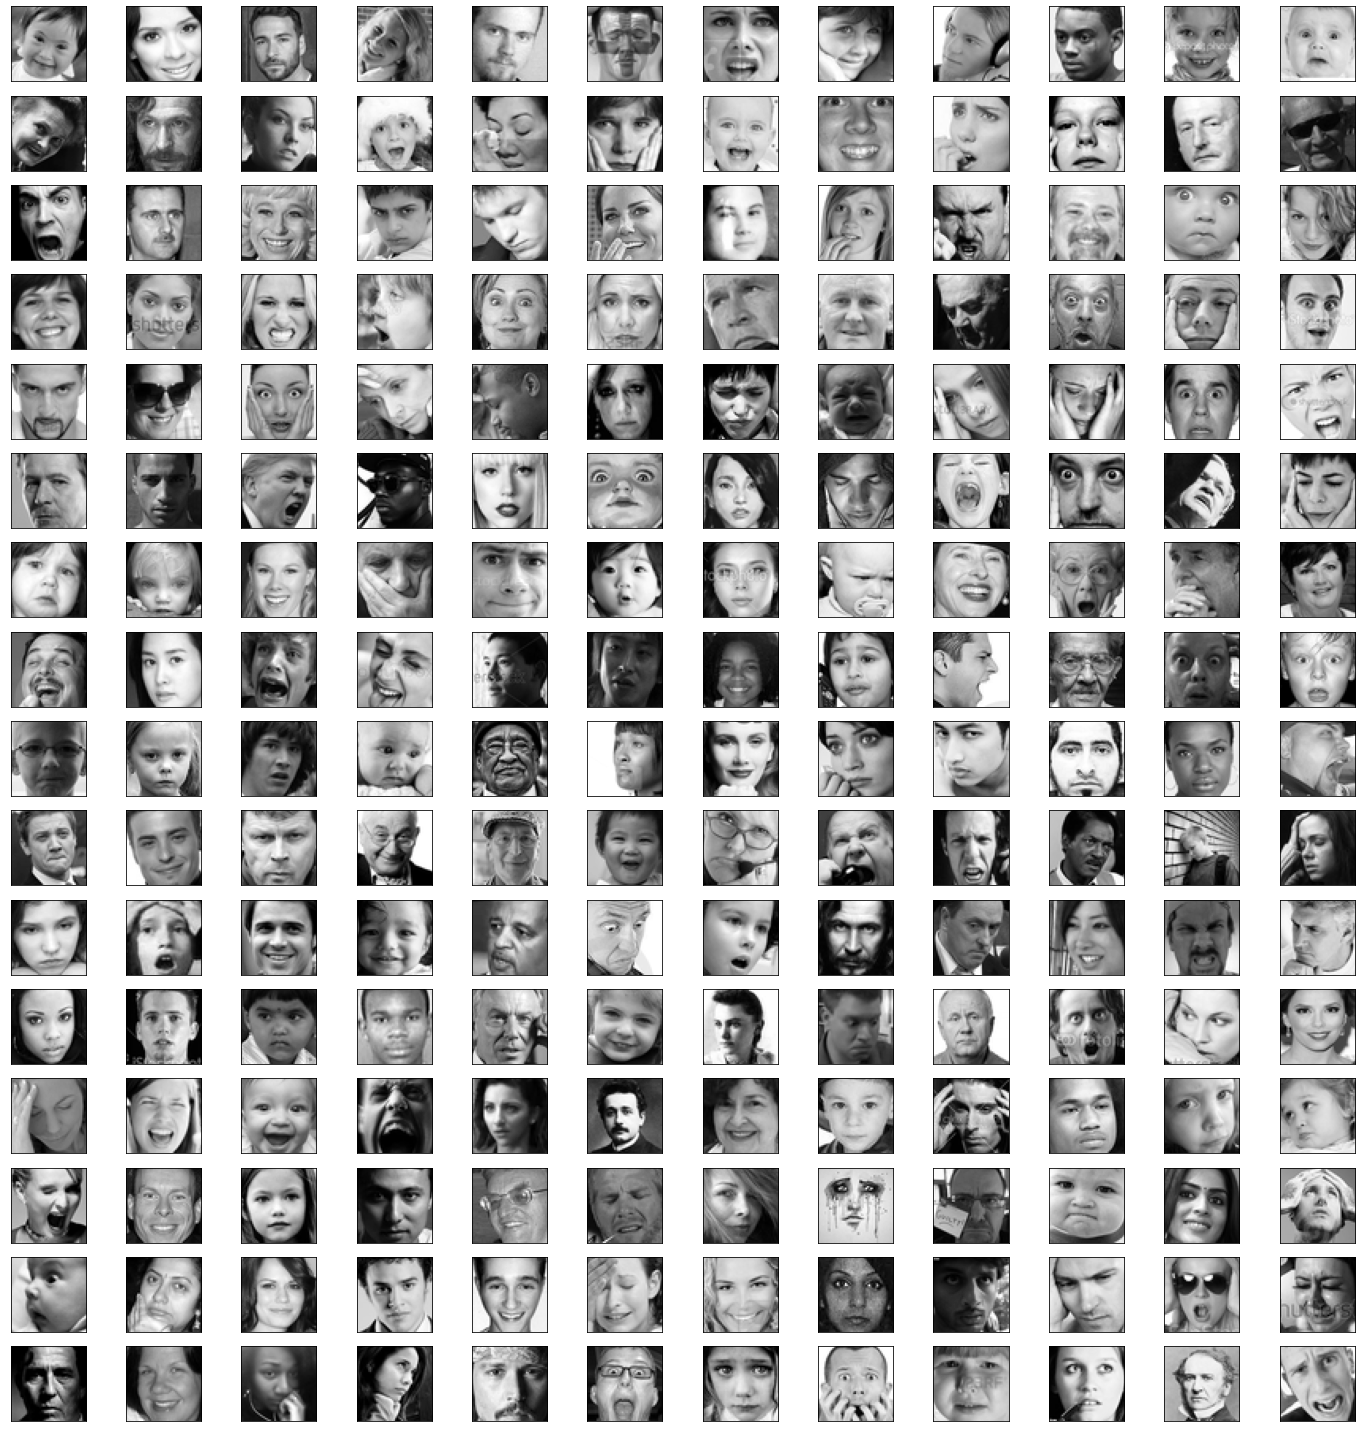

In [ ]:
def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

## Similarly we canvisualize any input with self-defined index with following code

(1, 48, 48, 1)


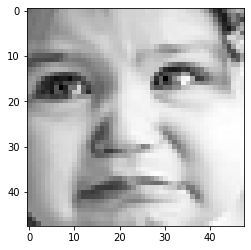

In [ ]:
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

### import brew2mpl

In [ ]:
import brewer2mpl
bmap = brewer2mpl.get_map('Set1', 'qualitative', 5)
colors = bmap.mpl_colors

### The function is used to plot the distribution of the labels of provided dataset ***edit this 

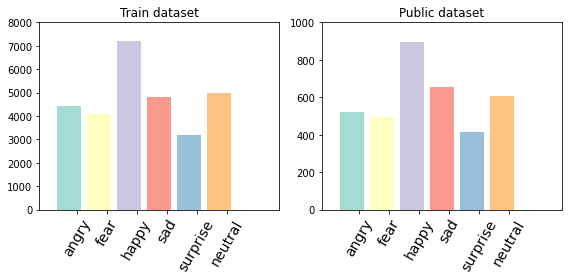

In [ ]:
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()
  
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Public dataset'], \
                  ylims =[8000,1000])

### Final Model Architecture CNN :

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Flatten())  
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(6, activation='softmax'))


# Optimizer:

In [ ]:
# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 32
batch_size = 128

modelF = modelN.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, verbose=1)

Training....
Epoch 1/5
225/225 [==============================] - 719s 3s/step - loss: 1.0640 - accuracy: 0.5882 - val_loss: 1.1468 - val_accuracy: 0.5626
Epoch 2/5
225/225 [==============================] - 715s 3s/step - loss: 0.9883 - accuracy: 0.6244 - val_loss: 1.1182 - val_accuracy: 0.5684
Epoch 3/5
225/225 [==============================] - 715s 3s/step - loss: 0.9177 - accuracy: 0.6514 - val_loss: 1.1425 - val_accuracy: 0.5740
Epoch 4/5
225/225 [==============================] - 717s 3s/step - loss: 0.8463 - accuracy: 0.6803 - val_loss: 1.1546 - val_accuracy: 0.5751
Epoch 5/5
225/225 [==============================] - 717s 3s/step - loss: 0.7695 - accuracy: 0.7136 - val_loss: 1.1598 - val_accuracy: 0.5737


### Model Evaluation 

In [ ]:
modelN.save('facial_1')
accuracy = modelF.history['accuracy']
val_accuracy = modelF.history['val_accuracy']
loss = modelF.history['loss']
val_loss = modelF.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Prediction and true labels

In [ ]:
y_prob = modelN.predict(X, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

### Evaluate model on private test set

In [ ]:
score = modelN.evaluate(X, y, verbose=0)
print ("model %s: %.2f%%" % (modelN.metrics_names[1], score[1]*100))

Function is used to compare the number of true labels as well as prediction results

In [ ]:
def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    ind = np.arange(1.5,7,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,7,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 7.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()
    
plot_distribution2(y_true, y_pred)

PCA

In [ ]:
#reshape
X = np.array(X)
X = X.reshape(3589, 48, 48,1)
X_new = X.reshape(3589, 2304)
X_new = X_new.astype("float32")
X_new /= 255
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train[:5, :]

Cross Validation

In [ ]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print (svc_1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0, )

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

ROC

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

F1 Score

In [ ]:
print(f1_score(y_true, y_pred, average='micro', zero_division='warn'))

Precision

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average='macro')
print('Precision: %.3f' % precision)

Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_true)
print('Accuracy: %f' % accuracy)


Confusion Matrix

In [ ]:
from sklearn import metrics
print ("Confusion Matrix:")
print (metrics.confusion_matrix(y_true, y_pred))



LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, Y_train) #y_train is required as this is supervised learning
X_test = lda.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
cm